# Backtesting SMA trading strategy using Vectorbt API

### Source code: 
https://pypi.org/project/vectorbt/ , https://vectorbt.dev/docs/index.html

In [1]:
# Import libraries
import vectorbt as vbt
import numpy as np
import pandas as pd
import plotly.io as pio

pio.renderers.default = 'svg' # comment this line out to get interactive charts

In [2]:
# Pull hostorical prices
price = vbt.YFData.download('BTC-USD', freq='D', fees=0.01, missing_index='drop').get('Close')
# Select time window to test.
price = price.loc["2015":"2022"]
price

Date
2015-01-01 00:00:00+00:00      314.248993
2015-01-02 00:00:00+00:00      315.032013
2015-01-03 00:00:00+00:00      281.082001
2015-01-04 00:00:00+00:00      264.195007
2015-01-05 00:00:00+00:00      274.473999
                                 ...     
2022-01-06 00:00:00+00:00    43160.929688
2022-01-07 00:00:00+00:00    41557.902344
2022-01-08 00:00:00+00:00    41733.941406
2022-01-09 00:00:00+00:00    41911.601562
2022-01-10 00:00:00+00:00    41857.117188
Freq: D, Name: Close, Length: 2567, dtype: float64

In [3]:
# Define short and long SMA windows. Test different window combinations to see results of Buy & Hold vs SMA strategy
fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 20)
entries = fast_ma.ma_above(slow_ma, crossover=True)
exits = fast_ma.ma_below(slow_ma, crossover=True)

# Fit the model and input starting investment to calculate total profit form the trading stategy
pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
pf.total_profit()

19271.29398733142

In [4]:
# Calculate total profit from the Buy & Hold strategy
pf1 = vbt.Portfolio.from_holding(price, init_cash=100)
pf1.total_profit()

13219.729937262262

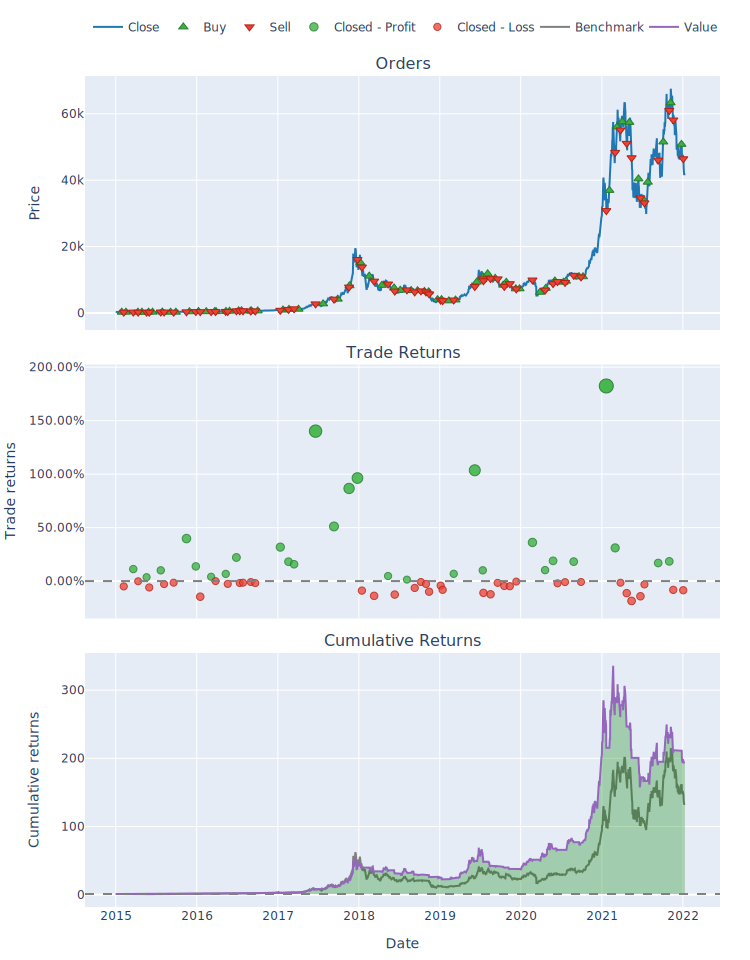

In [5]:
# Plot trading strategy
pf.plot().show()

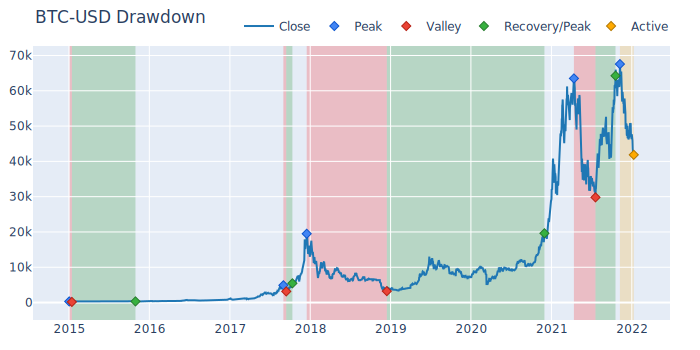

In [6]:
# Plot drawdown for the selected strategy
price.vbt.drawdowns.plot(title='BTC-USD Drawdown').show()

In [7]:
# Obtain complete stats for the trading strategy
pf.stats(freq='D')

Start                     2015-01-01 00:00:00+00:00
End                       2022-01-10 00:00:00+00:00
Duration                         2567 days 00:00:00
Initial Cash                                  100.0
Total Profit                           19271.293987
Total Return [%]                       19271.293987
Benchmark Return [%]                   13219.729937
Position Coverage [%]                     58.862485
Max Drawdown [%]                          58.757571
Avg Drawdown [%]                           9.100613
Max Drawdown Duration             526 days 00:00:00
Avg Drawdown Duration    37 days 10:20:18.461538461
Trade Count                                      65
Win Rate [%]                              43.076923
Best Trade [%]                           182.398197
Worst Trade [%]                          -18.570317
Avg Trade [%]                             12.286735
Max Trade Duration                105 days 00:00:00
Avg Trade Duration       23 days 05:54:27.692307692
Expectancy  